In [252]:
import numpy as np 
import matplotlib.pyplot as plt 

In [284]:
a = [] 
for l in open("test.txt","r").readlines()[1::2]: 
    a.append([float(x) for x in l.split(",")[:-1]])
arr = np.array(a); print(arr.shape)

(2890, 17)


In [285]:
b = [] 
for l in open("test.txt","r").readlines()[0::2]: 
    b.append([float(x) for x in l.split(",")[:-1]])
arr2 = np.array(b); print(arr2.shape)

(2890, 6)


In [286]:
arr[0]

array([ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   , -0.023, -0.023,  0.023, -0.023, -0.023,  0.023,  0.023,
        0.023])

In [287]:
arr2[0]

array([0.0650538, 0.0650538, 0.046    , 0.046    , 0.046    , 0.046    ])

In [288]:
len(arr[0])

17

(-0.07, 0.07)

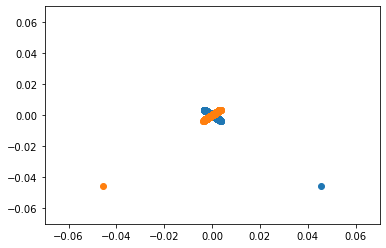

In [289]:
plt.scatter(arr[:,5],arr[:,6])  # caution: for the real system, index 6 is a velocity
plt.scatter(arr[:,7],arr[:,8])
plt.xlim(-0.07,0.07); plt.ylim(-0.07,0.07)

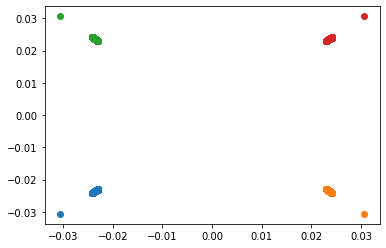

In [290]:
plt.scatter(arr[:,9],arr[:,10])
plt.scatter(arr[:,11],arr[:,12])
plt.scatter(arr[:,13],arr[:,14])
plt.scatter(arr[:,15],arr[:,16])

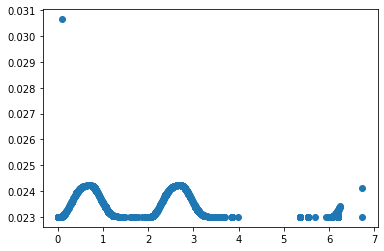

In [291]:
plt.scatter(arr[:,0],arr[:,11])  # real movement

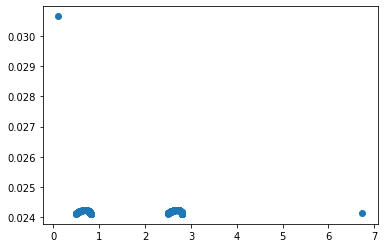

In [292]:
indexer = arr[:,11] > 0.0241
plt.scatter(arr[:,0][indexer],arr[:,11][indexer])  # only upper part close to max

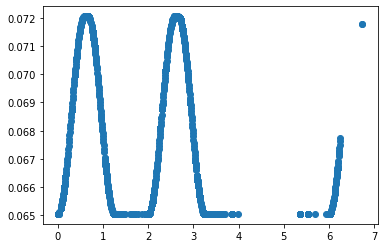

In [293]:
plt.scatter(arr[:,0],arr2[:,1])  # l0 (actuation function)

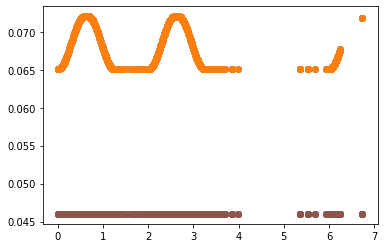

In [294]:
[plt.scatter(arr[:,0],arr2[:,i]) for i in range(len(arr2[0]))]

In [295]:
max(arr[:,0])

6.73664

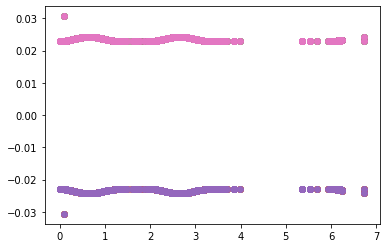

In [296]:
[plt.scatter(arr[:,0],arr[:,i]) for i in range(9,16)]

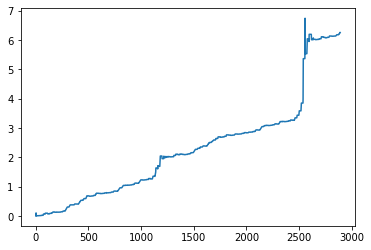

In [297]:
plt.plot(arr[:,0])